## Exploring and trying a baseline ngram language model of the NUS SMS Corpus

This is a corpus of SMS (Short Message Service) messages collected for research at the Department of Computer Science at the National University of Singapore. This dataset consists of 55,835 SMS messages. The messages largely originate from Singaporeans and mostly from students attending the University. These messages were collected from volunteers who were made aware that their contributions were going to be made publicly available. The data collectors opportunistically collected as much metadata about the messages and their senders as possible, so as to enable different types of analyses.

Data is available from: https://www.kaggle.com/rtatman/the-national-university-of-singapore-sms-corpus 

Tao Chen and Min-Yen Kan (2013). Creating a Live, Public Short Message Service Corpus: The NUS SMS Corpus. Language Resources and Evaluation, 47(2)(2013), pages 299-355.

This notebook is also used to generate the data for training.

In [1]:
import json
import pandas as pd
from statistics import mean, median, mode
import matplotlib.pyplot as plt


In [2]:
with open('data/smsCorpus_en_2015.03.09_all.json', encoding='utf-8') as f:
    data = json.load(f)

In [3]:
data['smsCorpus']['message'][100]

{'@id': 10220,
 'text': {'$': 'm going to be late leh.'},
 'source': {'srcNumber': {'$': 51},
  'phoneModel': {'@manufactuer': 'unknown', '@smartphone': 'unknown'},
  'userProfile': {'userID': {'$': 51},
   'age': {'$': 'unknown'},
   'gender': {'$': 'unknown'},
   'nativeSpeaker': {'$': 'unknown'},
   'country': {'$': 'SG'},
   'city': {'$': 'unknown'},
   'experience': {'$': 'unknown'},
   'frequency': {'$': 'unknown'},
   'inputMethod': {'$': 'unknown'}}},
 'destination': {'@country': 'unknown', 'destNumber': {'$': 'unknown'}},
 'messageProfile': {'@language': 'en', '@time': 'unknown', '@type': 'unknown'},
 'collectionMethod': {'@collector': 'howyijue',
  '@method': 'unknown',
  '@time': '2003/4'}}

In [4]:
try: # Use the default NLTK tokenizer.
    from nltk import word_tokenize, sent_tokenize 
    # Testing whether it works. 
    # Sometimes it doesn't work on some machines because of setup issues.
    word_tokenize(sent_tokenize("This is a foobar sentence. Yes it is.")[0])
except: # Use a naive sentence tokenizer and toktok.
    import re
    from nltk.tokenize import ToktokTokenizer
    # See https://stackoverflow.com/a/25736515/610569
    sent_tokenize = lambda x: re.split(r'(?<=[^A-Z].[.?]) +(?=[A-Z])', x)
    # Use the toktok tokenizer that requires no dependencies.
    toktok = ToktokTokenizer()
    word_tokenize = word_tokenize = toktok.tokenize

In [5]:
users = set()
texts = []
characters = []

for text in data['smsCorpus']['message']:
    users.add(text['source']['userProfile']['userID']['$'])
    texts.append(word_tokenize(str(text['text']['$'])))
    characters.append(str(text['text']['$']))

    
words = [len(text) for text in texts]
characters_count = [len(text) for text in characters]

print("Number of Users:", len(users))
print("Number of Texts:", len(data['smsCorpus']['message']))
print("Most common word counts per text message: ", mode(words))
print("Most common character counts per text message: ", mode(characters_count))
print("Median character counts per text message: ", median(characters_count))
print("Max character counts per text message: ", max(characters_count))
# print(texts[:1000])

Number of Users: 343
Number of Texts: 55835
Most common word counts per text message:  6
Most common character counts per text message:  20
Median character counts per text message:  36
Max character counts per text message:  910


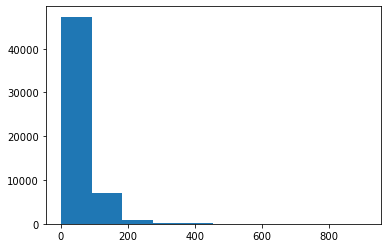

In [6]:
plt.hist(characters_count)
plt.show()

In [7]:
#Set a max length for text messages 
pd.set_option('max_colwidth', 310)

In [8]:
messages = data['smsCorpus']['message']

In [9]:
print(f'Total SMS count: {len(messages)}')

Total SMS count: 55835


In [10]:
full_df = pd.DataFrame(messages)

In [11]:
sms_df = full_df[['text']]
sms_df.head()

,text
0,{'$': 'Bugis oso near wat...'}
1,"{'$': 'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'}"
2,{'$': 'I dunno until when... Lets go learn pilates...'}
3,"{'$': 'Den only weekdays got special price... Haiz... Cant eat liao... Cut nails oso muz wait until i finish drivin wat, lunch still muz eat wat...'}"
4,{'$': 'Meet after lunch la...'}


In [12]:
def clean_sms(sms_text):
    sms = str(sms_text).lower()
    return sms[7:-2]

In [13]:
sms_df['clean_text'] = sms_df['text'].apply(clean_sms)

In [14]:
sms_df.head(50)

,text,clean_text
0,{'$': 'Bugis oso near wat...'},bugis oso near wat...
1,"{'$': 'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'}","go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat..."
2,{'$': 'I dunno until when... Lets go learn pilates...'},i dunno until when... lets go learn pilates...
3,"{'$': 'Den only weekdays got special price... Haiz... Cant eat liao... Cut nails oso muz wait until i finish drivin wat, lunch still muz eat wat...'}","den only weekdays got special price... haiz... cant eat liao... cut nails oso muz wait until i finish drivin wat, lunch still muz eat wat..."
4,{'$': 'Meet after lunch la...'},meet after lunch la...
5,{'$': 'm walking in citylink now ü faster come down... Me very hungry...'},m walking in citylink now ü faster come down... me very hungry...
6,{'$': '5 nights...We nt staying at port step liao...Too ex'},5 nights...we nt staying at port step liao...too ex
7,{'$': 'Hey pple...$700 or $900 for 5 nights...Excellent location wif breakfast hamper!!!'},hey pple...$700 or $900 for 5 nights...excellent location wif breakfast hamper!!!
8,"{'$': 'Yun ah.the ubi one say if ü wan call by tomorrow.call 67441233 look for irene.ere only got bus8,22,65,61,66,382. Ubi cres,ubi tech park.6ph for 1st 5wkg days.èn'}","yun ah.the ubi one say if ü wan call by tomorrow.call 67441233 look for irene.ere only got bus8,22,65,61,66,382. ubi cres,ubi tech park.6ph for 1st 5wkg days.èn"
9,{'$': 'Hey tmr maybe can meet you at yck'},hey tmr maybe can meet you at yck


In [15]:
sample_df = sms_df['clean_text'][0:1000]

In [16]:
sample_df.head()

0                                                                                                                           bugis oso near wat...
1                                 go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...
2                                                                                                  i dunno until when... lets go learn pilates...
3    den only weekdays got special price... haiz... cant eat liao... cut nails oso muz wait until i finish drivin wat, lunch still muz eat wat...
4                                                                                                                          meet after lunch la...
Name: clean_text, dtype: object

In [17]:
with open('1000sms.txt', mode='w', encoding='utf-8') as f:
    f.write(sample_df.to_string(header=False, index=False))

In [18]:
train_singlish_df = full_df.sample(n=20000, random_state=42)
train_singlish_df['clean_text'] = train_singlish_df['text'].apply(clean_sms)
train_singlish_df = train_singlish_df['clean_text']

test_singlish_df = sms_df.drop(train_singlish_df.index)
test_singlish_df['clean_text'] = test_singlish_df['text'].apply(clean_sms) 
test_singlish_df = test_singlish_df['clean_text']

In [19]:
train_singlish_df.head()

1126                                                                                                                                                 enjoy ur holiday..
42937                                                                                                                                                      cosplay fail
34044                                                                                                                                    woo wah got new bags again eh.
46225    haha i was bored! hahaha fell asleep for awhile! hahaha hmm:p hahaokay! we do work then (: btw your personal statement! haha omg socool! what you all playing!
31849                                                                                                            i coming down sch...i on  <#>  at nus high sch liao...
Name: clean_text, dtype: object

In [20]:
test_singlish_df.head()

2                                                                                                                      i dunno until when... lets go learn pilates...
3                        den only weekdays got special price... haiz... cant eat liao... cut nails oso muz wait until i finish drivin wat, lunch still muz eat wat...
5                                                                                                   m walking in citylink now ü faster come down... me very hungry...
8    yun ah.the ubi one say if ü wan call by tomorrow.call 67441233 look for irene.ere only got bus8,22,65,61,66,382. ubi cres,ubi tech park.6ph for 1st 5wkg days.èn
9                                                                                                                                   hey tmr maybe can meet you at yck
Name: clean_text, dtype: object

In [21]:
print(f'Size of train Singlish dataset = {len(train_singlish_df)}')
print(f'Size of test Singlish dataset = {len(test_singlish_df)}')

Size of train Singlish dataset = 20000
Size of test Singlish dataset = 35835


In [22]:
#Create the Singlish train and test datasets as files
with open('train_singlish.txt', mode='w', encoding='utf-8') as f:
    f.write(train_singlish_df.to_string(header=False, index=False))
    
with open('test_singlish.txt', mode='w', encoding='utf-8') as f:
    f.write(test_singlish_df.to_string(header=False, index=False))

In [23]:
from nltk.util import pad_sequence
from nltk.util import bigrams
from nltk.util import ngrams
from nltk.util import everygrams
from nltk.lm.preprocessing import pad_both_ends
from nltk.lm.preprocessing import flatten

In [24]:
try: # Use the default NLTK tokenizer.
    from nltk import word_tokenize, sent_tokenize 
    # Testing whether it works. 
    # Sometimes it doesn't work on some machines because of setup issues.
    word_tokenize(sent_tokenize("This is a foobar sentence. Yes it is.")[0])
except: # Use a naive sentence tokenizer and toktok.
    import re
    from nltk.tokenize import ToktokTokenizer
    # See https://stackoverflow.com/a/25736515/610569
    sent_tokenize = lambda x: re.split(r'(?<=[^A-Z].[.?]) +(?=[A-Z])', x)
    # Use the toktok tokenizer that requires no dependencies.
    toktok = ToktokTokenizer()
    word_tokenize = word_tokenize = toktok.tokenize

In [25]:
import os
import requests
import io #codecs

with io.open('train_singlish.txt', encoding='utf-8') as fin:
    text = fin.read()

In [26]:
# Tokenize the text.
tokenized_text = [list(map(str.lower, word_tokenize(sent))) 
                  for sent in sent_tokenize(text)]

In [27]:
tokenized_text[0]

['enjoy',
 'ur',
 'holiday..',
 'cosplay',
 'fail',
 'woo',
 'wah',
 'got',
 'new',
 'bags',
 'again',
 'eh',
 '.']

In [28]:
print(text[:1000])

enjoy ur holiday..
                                                                                                                                                                                                                                                                                                          cosplay fail
                                                                                                                                                                                                                                                                                        woo wah got new bags again eh.
                                                                   


In [29]:
from nltk.lm.preprocessing import padded_everygram_pipeline

# Preprocess the tokenized text for 3-grams language modelling
n = 3
train_data, padded_sents = padded_everygram_pipeline(n, tokenized_text)

In [30]:
from nltk.lm import MLE
model = MLE(n) # Lets train a 3-grams model, previously we set n=3

In [31]:
len(model.vocab)

0

In [32]:
model.fit(train_data, padded_sents)
print(model.vocab)

<Vocabulary with cutoff=1 unk_label='<UNK>' and 19811 items>


In [33]:
len(model.vocab)

19811

In [34]:
print(model.vocab.lookup(tokenized_text[0]))

('enjoy', 'ur', 'holiday..', 'cosplay', 'fail', 'woo', 'wah', 'got', 'new', 'bags', 'again', 'eh', '.')


In [35]:
print(model.counts)

<NgramCounter with 3 ngram orders and 947313 ngrams>


In [36]:
model.counts['meh'] # i.e. Count('meh')

76

In [37]:
model.score('meh') # P('meh')

0.00022506848300881026

In [38]:
print(model.generate(20, random_seed=321))

['<s>', '<s>', 'lol', 'it', 'only', 'wrote', 'ovaltine', '.', '</s>', '</s>', '</s>', '</s>', '</s>', '</s>', '</s>', '</s>', '</s>', '</s>', '</s>', '</s>']


In [39]:
from nltk.tokenize.treebank import TreebankWordDetokenizer

detokenize = TreebankWordDetokenizer().detokenize

def generate_sent(model, num_words, random_seed=42):
    """
    :param model: An ngram language model from `nltk.lm.model`.
    :param num_words: Max no. of words to generate.
    :param random_seed: Seed value for random.
    """
    content = []
    for token in model.generate(num_words, random_seed=random_seed):
        if token == '<s>':
            continue
        if token == '</s>':
            break
        content.append(token)
    return detokenize(content)

In [40]:
for i in range(321, 350):
    print(generate_sent(model, 20, random_seed=i))

lol it only wrote ovaltine.
the sofa...........wow, cookies ah.
my phone all i know._.
has problms in chargng.befo girls buk vans there baba has 2 set something then i upload lor.
forgive & forget.
2moro den understand le lols not training?
ten special people & u c n u can be contacted at <#>: (unna dun u
im single n avail? hehe...juz came bk yest...on the day again?
she did a ride all right and i get a chance to go with my poly friends eh.
we juz watched italian job.
skype: d wa! that.s later than <#> note!

from hont.
u late?

!

: -) tgit boht resrch aur calculatns ki hain mai ne make it next time but shld be fine

?
haha its alright!
< #> eat already t be there, so lame, hostel should have told zx.

wat u want to meet hiim?
okay! have a good trip: -) go to bk then.
getting ready as we speak we are late.
wat time u wan do wad?
the same.. i hear them bumbling around depends on bus from paya lebar.
a job tt starts work in e lib now.
